In [1]:

import numpy as np
import altair as alt
from tqdm import tqdm
from general_consts import *
alt.data_transformers.enable('csv')
import csv
import json
import os
import pandas as pd
from scipy import integrate
import matplotlib.pyplot as plt

# alt.renderers.enable('altair_saver', fmts=['png'])

In [2]:
def get_df(path, table_name):
    df = pd.read_csv(fr"{path}/{table_name}.csv")
    df[CPUColumns.TIME] = pd.to_datetime(df[CPUColumns.TIME], unit='s')
    df[CPUColumns.TIME] += pd.Timedelta(hours=2)
    return df

def load_tables(path):
    cpu_df = get_df(path, TableNames.CPU)
    memory_df = get_df(path, TableNames.MEMORY)
    all_processes_df = get_df(path, TableNames.ALL_PROCESSES)
    disk_df = get_df(path, TableNames.DISK)
    # splunk_logs_df = pd.read_csv(fr"{path}/logs.csv")
    return cpu_df, memory_df, all_processes_df, disk_df
    
def draw_plot(df, y, path, plot_name, save=True):
    chart = alt.Chart(df).mark_line(interpolate='linear').encode(
        alt.Y(f"{y}:Q", scale=alt.Scale(domain=[min(df[y]), max(df[y])])),
        alt.X(f"{CPUColumns.TIME}:T"),
    ).properties(
        width=2100,
        height=300
    )
    if save:
        # Create PNG image data and then write to a file
        with alt.data_transformers.enable('default'):
            chart.save(f"{path}/graphs/{plot_name}.png", engine="altair_saver")
    return chart

In [3]:
# tables = []
# for measurment_no in range(13,19):
#     path = fr"../../Repositories/GreenSecurity-FirstExperiment/Dell Inc. Linux 5.15.0-69-generic/Splunk Enterprise SIEM/Power Saver Plan/One Scan/Measurement {measurment_no}"
#     cpu_df, memory_df, all_processes_df, disk_df, splunk_logs_df = load_tables(path)
#     tmp = all_processes_df[(all_processes_df['PID'].isin(pids))]
#     if not tmp.empty:
#         tables.append(tmp.groupby('PID').mean())
    # cpu = draw_plot(cpu_df, CPUColumns.USED_PERCENT, path, 'cpu')
    # disc_r_c = draw_plot(disk_df, DiskIOColumns.READ_COUNT, path, 'disk_read_count')
    # disc_w_c = draw_plot(disk_df, DiskIOColumns.WRITE_COUNT, path, 'disk_write_count')
    # disc_r_b = draw_plot(disk_df, DiskIOColumns.READ_BYTES, path, 'disk_read_bytes')
    # disc_w_b = draw_plot(disk_df, DiskIOColumns.WRITE_BYTES, path, 'disk_write_bytes')
    # splunk_logs_df['_time'] = pd.to_datetime(splunk_logs_df['_time'])
    # splunk_logs_df['_time'] = splunk_logs_df['_time'].dt.tz_localize(None)

    # # Define number of bins and opacity range
    # n_bins = 200
    # logs = alt.Chart(splunk_logs_df).mark_bar(opacity=0.3, color='green').encode(
    #     alt.Y("count():Q"),
    #     alt.X("_time:T", bin=alt.Bin(maxbins=n_bins)),
    # ).properties(
    #     width=2100,
    #     height=300,
    # )
    # # Create PNG image data and then write to a file
    # with alt.data_transformers.enable('default'):
    #     logs.save(f"{path}/graphs/logs_dist.png", engine="altair_saver")
    #     alt.layer(cpu,logs).resolve_scale(
    #     y = 'independent').save(f"{path}/graphs/cpu_logs_merge.png", engine="altair_saver")
        
    #     alt.layer(disc_r_c,logs).resolve_scale(
    #     y = 'independent').save(f"{path}/graphs/disc_r_c_logs_merge.png", engine="altair_saver")
        
    #     alt.layer(disc_w_c,logs).resolve_scale(
    #     y = 'independent').save(f"{path}/graphs/disc_w_c_logs_merge.png", engine="altair_saver")
        
    #     alt.layer(disc_r_b,logs).resolve_scale(
    #     y = 'independent').save(f"{path}/graphs/disc_r_b_logs_merge.png", engine="altair_saver")
        
    #     alt.layer(disc_w_b,logs).resolve_scale(
    #     y = 'independent').save(f"{path}/graphs/disc_w_b_logs_merge.png", engine="altair_saver")
        

In [4]:
# splunk_logs_df['_time'] = pd.to_datetime(splunk_logs_df['_time']).dt.strftime('%H:%M:%S')
# Define number of bins and opacity range
# n_bins = 200
# opacity_range = [0.2, 0.8]


# chart = alt.Chart(splunk_logs_df).mark_bar(opacity=0.3, color='green').encode(
#     alt.Y("count():Q"),
#     alt.X("_time:T", bin=alt.Bin(maxbins=n_bins))
# ).properties(
#     width=2100,
#     height=300,
#     # title='Bar Chart with Adjustable Opacity'
# )
# with alt.data_transformers.enable('default'):
#     alt.layer(draw_plot(cpu_df, CPUColumns.USED_PERCENT, path, 'cpu'),chart).resolve_scale(
#         y = 'independent'
#     ).save(f"{path}/graphs/merge.png", engine="altair_saver")


In [5]:
# splunk_logs_df['_time'] = pd.to_datetime(splunk_logs_df['_time']).dt.strftime('%H:%M:%S')
# Define number of bins and opacity range
# n_bins = 200
# opacity_range = [0.2, 0.8]

# alt.layer(alt.Chart(df_pid).mark_line(interpolate='linear').encode(
#     alt.Y(f"{CPUColumns.USED_PERCENT.split(' ')[1]}:Q", scale=alt.Scale(domain=[min(df[CPUColumns.USED_PERCENT.split(' ')[1]]), max(df[CPUColumns.USED_PERCENT.split(' ')[1]])])),
#     alt.X(f"{CPUColumns.TIME}:T"),
# ).properties(
#     width=2100,
#     height=300
# ),alt.Chart(splunk_logs_df).mark_bar(opacity=0.3, color='green').encode(
# alt.Y("count():Q"),
# alt.X("_time:T", bin=alt.Bin(maxbins=n_bins))
# ).properties(
# width=2100,
# height=300,
# # title='Bar Chart with Adjustable Opacity'
# )).resolve_scale(
#     y = 'independent'
#     )


In [6]:
# alt.Chart(splunk_logs_df).mark_bar(opacity=0.3, color='green').encode(
# alt.Y("count():Q"),
# alt.X("_time:T", bin=alt.Bin(maxbins=n_bins))
# ).properties(
# width=2100,
# height=300,
# # title='Bar Chart with Adjustable Opacity'
# )

In [7]:


path = '/home/shouei/GreenSecurity-FirstExperiment/VMware, Inc. Linux 3.10.0-1160.88.1.el7.x86_64/Splunk Enterprise SIEM/Power Saver Plan/One Scan'
rng = range(22,26)
dirs = {f'Measurement {i}'for i in rng}
measurement_dirs = sorted([d for d in os.listdir(path) if d in dirs])
# measurement_dirs = sorted([d for d in os.listdir(path) if d.startswith('Measurement')])

# Load pids from json files
pids = {}
for dir_name in measurement_dirs:
    file_path = os.path.join(path, dir_name, 'pids.json')
    with open(file_path, 'r') as f:
        data = json.load(f)
        # fix it and remove!
        data_times = {}
        # for k,v in data.items():
        #     data[k] = v[1]
        #     data_times[k] = v[2]
        pids[dir_name] = data

exp_dfs = {}
for dir_name in pids:
    curr = pids[dir_name]
    data = []
    for name, [sid, pid, time, run_duration] in curr.items():
       data.append((name, sid, pid, time, run_duration)) 
    curr_df = pd.DataFrame(data, columns=['name', 'sid', 'pid', 'time', 'run_duration'])
    curr_df.name = curr_df.name.str.strip(' Clone')
    curr_df.time = pd.to_datetime(curr_df.time)
    exp_dfs[dir_name] = curr_df.sort_values('time')    

# Combine all relevant data into a single dataframe
dfs = {}
for dir_name, pid_list in pids.items():
    file_path = os.path.join(path, dir_name, 'processes_data.csv')
    df = pd.read_csv(file_path)
    df['Time(sec)'] = pd.to_datetime(df['Time(sec)'], unit='s', utc=True)
    df = df[df['PID'].isin(exp_dfs[dir_name].pid.values)].sort_values('Time(sec)') 
    df['Measurement'] = dir_name
    dfs[dir_name] = df
    
combined_df = pd.concat(dfs)

# Group by PID and calculate mean CPU
grouped_df = combined_df.groupby('PID')['CPU(%)'].mean()

print(grouped_df)


PID
2827     10.854615
3244     10.622258
3246     18.110923
3247     20.523093
3666      8.266250
4087      6.901000
4089     18.061169
4090     21.109907
13809    11.223947
14205    10.670690
14207    18.440167
14208    22.281928
24969    10.946000
24973    11.705000
24978    20.073151
25113    23.770132
Name: CPU(%), dtype: float64


Merge when the rules running one after an other with a delay

In [8]:
# grouped_dfs = {}
# merged_dfs = {}

# from datetime import timedelta, datetime
# for measurment_name in measurement_dirs:
#     df1 = dfs[measurment_name].where(lambda x: x['Time(sec)'].dt.minute >= 1)
#     df2 = exp_dfs[measurment_name].where(lambda x: x['time'].dt.minute >= 1)
#     # merge df1 and df2 on 'pid' using a left join
#     merged_df = pd.merge(df1, df2, left_on='PID', right_on='pid', how='left')

#     # filter merged_df to keep only rows where df1['time'] is between df2['start_time'] and df2['start_time'] + 1 minute
#     merged_df = merged_df[(merged_df['Time(sec)'] >= merged_df['time']) & (merged_df['Time(sec)'] <= merged_df['time'] + timedelta(minutes=1))]

#     # drop the 'start_time' column, which is now redundant
#     merged_df = merged_df.drop(columns=['time'])
#     grouped_dfs[measurment_name] = merged_df.groupby('name').mean()
#     merged_dfs[measurment_name] = merged_df
# # concatenate the three data frames along the columns axis
# merged_df = pd.concat([x['CPU(%)'] for x in grouped_dfs.values()], axis=1)

# # compute the mean along the index axis
# mean_df = merged_df.mean(axis=1)
# mean_df = mean_df.reset_index().rename({0:'CPU(%)'}, axis=1)
# mean_df


In [9]:
# alt.Chart(mean_df).mark_bar().encode(
#         alt.Y("CPU(%):Q"),
#         alt.X(f"name:N"),
#     ).properties(
#         width=600,
#         height=300
#     )

In [10]:
# rule_chart = alt.Chart(df2).mark_rule(color='red', strokeDash=[5, 5]).encode(
#     x='time:T'
# )

# c2 = alt.Chart(merged_dfs[measurment_name]).mark_line().encode(
#         alt.Y("CPU(%):Q"),
#         alt.X(f"Time(sec):T"),
#     ).properties(
#         width=600,
#         height=300
#     )
# c2+rule_chart

Merge when all the rules running in the same time

In [11]:
relevant_processes_pid_names_grouped_dict = {}
relevant_processes_pid_names_mean_windows_dict = {}
relevant_names_inegral_dict = {}

# path = fr"../../Repositories/GreenSecurity-FirstExperiment/Dell Inc. Linux 5.15.0-70-generic/Splunk Enterprise SIEM/Power Saver Plan/One Scan/"
for measurment_name in measurement_dirs:
    pid_1_times = set(exp_dfs[measurment_name].groupby('pid').count().where(lambda x: x==1).dropna().index)
    name_1_times = exp_dfs[measurment_name].where(lambda x: x.pid.isin(pid_1_times))[['name','pid']]
    relevant_processes = dfs[measurment_name].where(lambda x: x.PID.isin(pid_1_times))
    relevant_processes_pid_names = pd.merge(relevant_processes, name_1_times, left_on='PID', right_on='pid')
    
    # Get start time
    start_time = relevant_processes_pid_names['Time(sec)'].min()
    # Calculate delta time in seconds
    relevant_processes_pid_names['delta_time'] = (relevant_processes_pid_names['Time(sec)'] - start_time).dt.total_seconds()
    print(len(relevant_processes_pid_names)/relevant_processes_pid_names['delta_time'].max())
    #####Create a chart########
    # Create the dropdown menu selection
    name_selection = alt.selection_multi(fields=['name'], bind='legend')
    # Define the chart
    chart = alt.Chart(relevant_processes_pid_names).mark_line(interpolate='linear').encode(
            alt.Y("CPU(%):Q"),
            alt.X(f"delta_time:Q"),
            alt.Color('name:N', scale=alt.Scale(scheme='category20')),
            opacity=alt.condition(name_selection, alt.value(1), alt.value(0.1))
        ).properties(
            width=1500,
            height=500
        ).add_selection(name_selection).configure_legend(
            orient='bottom',
            labelLimit=10000,
            columns=4,
            labelFontSize=15
        )
    with alt.data_transformers.enable('default'):
        chart.save(f"{path}/{measurment_name}/graphs/interactive_line.html")
    ##########################
    
    #####Create a chart########
    rule_chart = alt.Chart(relevant_processes_pid_names).mark_rule(strokeDash=[5, 5]).encode(
    x='min(Time(sec)):T',color='name'
    )

    c2 = alt.Chart(relevant_processes_pid_names).mark_line(interpolate='linear').encode(
            alt.Y("CPU(%):Q"),
            alt.X(f"Time(sec):T"),
        ).properties(
            width=1000,
            height=500
        )
    mean_chart = alt.Chart(relevant_processes_pid_names).mark_rule(color='red', strokeDash=[5, 5]).encode(
        y='mean(CPU(%)):Q'
    )

    chart2 = (c2+rule_chart+mean_chart).configure_legend(
                labelLimit=10000,
                labelFontSize=15
            )
    with alt.data_transformers.enable('default'):
        chart2.save(f"{path}/{measurment_name}/graphs/total_cpu.html")
    ##########################
    
    relevant_processes_pid_names_grouped = relevant_processes_pid_names.groupby('name').mean()
    relevant_processes_pid_names_grouped_dict[measurment_name] = relevant_processes_pid_names_grouped
    #integral by name of cpu over time
    relevant_names_inegral_dict[measurment_name] = relevant_processes_pid_names.groupby('name').apply(lambda g: integrate.trapz(g['CPU(%)'], x=g['delta_time']))

    
    # # Define the time window size in minutes
    # time_window_size = 1
    # last_sec = int(np.ceil(relevant_processes_pid_names['delta_time'].max()))
    # # Create an empty column to store the mean values
    # relevant_processes_pid_names['mean_col'] = pd.Series()
    # relevant_processes_pid_names['time_window'] = pd.Series()

    # # Iterate over the time series data, and calculate the mean for each time window
    # for i in range(last_sec):
    #     start_time = i
    #     end_time = start_time + time_window_size
    #     window_data = relevant_processes_pid_names[(relevant_processes_pid_names['delta_time'] >= start_time) & (relevant_processes_pid_names['delta_time'] < end_time)]
    #     mean_values = window_data.groupby('name')['CPU(%)'].mean()
    #     for name in mean_values.index:
    #         relevant_processes_pid_names.loc[window_data[window_data['name']==name].index, 'mean_col'] = mean_values[mean_values.index==name][0]
    #         relevant_processes_pid_names.loc[window_data[window_data['name']==name].index, 'time_window'] = i
    
    relevant_processes_pid_names_mean_windows_dict[measurment_name] = relevant_processes_pid_names
    




23.645366416164503
21.21706932839352


/home/shouei/anaconda3/envs/py38/lib/python3.8/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning: 'selection_multi' is deprecated.  Use 'selection_point'
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)
/home/shouei/anaconda3/envs/py38/lib/python3.8/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning: 'add_selection' is deprecated. Use 'add_params' instead.
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)
/tmp/ipykernel_5789/1033985331.py:63: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  relevant_processes_pid_names_grouped = relevant_processes_pid_names.groupby('name').mean()
/home/shouei/anaconda3/envs/py38/lib/python3.8/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning: 'selection_multi' is deprecated.

25.735018803406682
21.251691482597394


/tmp/ipykernel_5789/1033985331.py:63: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  relevant_processes_pid_names_grouped = relevant_processes_pid_names.groupby('name').mean()
/home/shouei/anaconda3/envs/py38/lib/python3.8/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning: 'selection_multi' is deprecated.  Use 'selection_point'
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)
/home/shouei/anaconda3/envs/py38/lib/python3.8/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning: 'add_selection' is deprecated. Use 'add_params' instead.
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)
/tmp/ipykernel_5789/1033985331.py:63: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, num

In [36]:
durations = ["enable_24","enable_48","disable_24","disable_48"]
durations

['enable_24', 'enable_48', 'disable_24', 'disable_48']

In [15]:
import subprocess
import os
dirs = {f'Measurement {i}'for i in rng}
logs_len_list = []
for j,i in enumerate(rng):
    # load processes data from csv
    path = fr"./VMware, Inc. Linux 3.10.0-1160.88.1.el7.x86_64/Splunk Enterprise SIEM/Power Saver Plan/One Scan/Measurement {i}"
    cpu_df, memory_df, all_processes_df, disk_df = load_tables(path)
    # find the start and end time of all processes_df 
    start_time = all_processes_df[CPUColumns.TIME].min().strftime('%m/%d/%Y:%H:%M:%S')
    end_time = all_processes_df[CPUColumns.TIME].max().strftime('%m/%d/%Y:%H:%M:%S')
    command = f'echo sH231294| sudo -S -E env "PATH=$PATH" splunk search "index=main where (earliest="{start_time}" latest="{end_time}")" -output csv -maxout 0 -auth shouei:sH231294 > "{path}/logs.csv"'
    print(command)
    # run the bash command
    subprocess.run(command, shell=True)
    

echo sH231294| sudo -S -E env "PATH=$PATH" splunk search "index=main where (earliest="06/08/2023:13:33:01" latest="06/08/2023:13:48:00")" -output csv -maxout 0 -auth shouei:sH231294 > "./VMware, Inc. Linux 3.10.0-1160.88.1.el7.x86_64/Splunk Enterprise SIEM/Power Saver Plan/One Scan/Measurement 22/logs.csv"


[sudo] password for shouei: WARNING: Server Certificate Hostname Validation is disabled. Please see server.conf/[sslConfig]/cliVerifyServerName for details.


echo sH231294| sudo -S -E env "PATH=$PATH" splunk search "index=main where (earliest="06/08/2023:13:51:53" latest="06/08/2023:14:06:53")" -output csv -maxout 0 -auth shouei:sH231294 > "./VMware, Inc. Linux 3.10.0-1160.88.1.el7.x86_64/Splunk Enterprise SIEM/Power Saver Plan/One Scan/Measurement 23/logs.csv"


[sudo] password for shouei: WARNING: Server Certificate Hostname Validation is disabled. Please see server.conf/[sslConfig]/cliVerifyServerName for details.


echo sH231294| sudo -S -E env "PATH=$PATH" splunk search "index=main where (earliest="06/08/2023:14:10:50" latest="06/08/2023:14:25:49")" -output csv -maxout 0 -auth shouei:sH231294 > "./VMware, Inc. Linux 3.10.0-1160.88.1.el7.x86_64/Splunk Enterprise SIEM/Power Saver Plan/One Scan/Measurement 24/logs.csv"


[sudo] password for shouei: WARNING: Server Certificate Hostname Validation is disabled. Please see server.conf/[sslConfig]/cliVerifyServerName for details.


echo sH231294| sudo -S -E env "PATH=$PATH" splunk search "index=main where (earliest="06/08/2023:14:29:43" latest="06/08/2023:14:44:42")" -output csv -maxout 0 -auth shouei:sH231294 > "./VMware, Inc. Linux 3.10.0-1160.88.1.el7.x86_64/Splunk Enterprise SIEM/Power Saver Plan/One Scan/Measurement 25/logs.csv"


/bin/sh: ./VMware, Inc. Linux 3.10.0-1160.88.1.el7.x86_64/Splunk Enterprise SIEM/Power Saver Plan/One Scan/Measurement 25/logs.csv: Permission denied


In [25]:
command

'sudo -E env "PATH=$PATH" splunk search "index=main where earliest=2023-06-08 14:29:43.128379904" -output csv -maxout 0 -auth shouei:sH231294 > "Measurement 25/logs.csv"'

In [18]:
dirs = {f'Measurement {i}'for i in rng}
logs_len_list = []
for j,i in enumerate(rng):
    # print(j)
    path = fr"./VMware, Inc. Linux 3.10.0-1160.88.1.el7.x86_64/Splunk Enterprise SIEM/Power Saver Plan/One Scan/Measurement {i}"
    curr_duration = durations[j%len(durations)]
    logs = pd.read_csv(fr"{path}/logs.csv")
    logs._time = pd.to_datetime(logs._time)
    logs = logs.where(lambda x: x._time.dt.hour == logs._time.dt.hour.unique().min())
    logs_len_list.append(len(logs.dropna()))

In [19]:
dirs = {f'Measurement {i}'for i in rng}
integral_list = []
for j,i in enumerate(rng):
    print(j)
    curr_duration = durations[j%len(durations)]
    curr_df = relevant_processes_pid_names_mean_windows_dict[f'Measurement {i}']
    name_integral = {}
    for name in curr_df.name.unique():
        integral = integrate.simpson(curr_df[curr_df['name']==name]['CPU(%)'], x=curr_df[curr_df['name']==name]['delta_time'])
        name_integral[name] = integral
    duration_name = curr_duration
    kind = ''
    if j < len(rng)//2:
        kind = 'lite'
    else:
        kind = 'heavy'
    integral_list.append((name_integral, duration_name, f'Measurement {i}', kind, logs_len_list[j]))
    

0
1
2
3


In [20]:
[len(x[0].keys()) for x in integral_list]

[4, 4, 4, 4]

In [21]:
df = pd.DataFrame(integral_list, columns=['integral', 'duration', 'measurment_num', 'kind', 'logs_number'])
df

,integral,duration,measurment_num,kind,logs_number
0,{'Windows Event Log Clearing Events': 39.66785...,enable_24,Measurement 22,lite,76
1,"{'New Local Admin Account': 32.91334126636185,...",enable_48,Measurement 23,lite,40
2,{'Windows Event Log Clearing Events': 43.79784...,disable_24,Measurement 24,heavy,97
3,{'Windows Event Log Clearing Events': 40.90465...,disable_48,Measurement 25,heavy,4


In [22]:
# step = 1

# dirs = {f'Measurement {i}'for i in rng}
# for i in rng:
#     if i == step:
#         break
#     first_measurment = f'Measurement {i}'
#     sec_measurment = f'Measurement {i+step}'
#     first_relevant_processes_pid_names = relevant_processes_pid_names_mean_windows_dict[first_measurment]
#     sec_relevant_processes_pid_names = relevant_processes_pid_names_mean_windows_dict[sec_measurment]
    
#     rule_chart_first = alt.Chart(first_relevant_processes_pid_names).mark_rule(strokeDash=[5, 5]).encode(
#         x='min(delta_time):Q',color='name'
#     )

#     c2_first = alt.Chart(first_relevant_processes_pid_names).mark_line(interpolate='linear').encode(
#             alt.Y("CPU(%):Q"),
#             alt.X(f"delta_time:Q"),
#         ).properties(
#             width=1000,
#             height=500
#         )
#     mean_chart_first = alt.Chart(first_relevant_processes_pid_names).mark_rule(color='blue', strokeDash=[5, 5]).encode(
#         y='mean(CPU(%)):Q'
#     )
#     rule_chart_sec = alt.Chart(sec_relevant_processes_pid_names).mark_rule(strokeDash=[5, 5]).encode(
#         x='min(delta_time):Q',color='name'
#     )

#     c2_sec = alt.Chart(sec_relevant_processes_pid_names).mark_line(color='red',interpolate='linear').encode(
#             alt.Y("CPU(%):Q"),
#             alt.X(f"delta_time:Q"),
#         ).properties(
#             width=1000,
#             height=500
#         )
#     mean_chart_sec = alt.Chart(sec_relevant_processes_pid_names).mark_rule(color='red', strokeDash=[5, 5]).encode(
#         y='mean(CPU(%)):Q'
#     )
#     with alt.data_transformers.enable('default'):
#         (c2_first+rule_chart_first+mean_chart_first+c2_sec+rule_chart_sec+mean_chart_sec).configure_legend(
#                 labelLimit=10000,
#                 labelFontSize=15
#             ).save(f"{path}/{measurment_name}/graphs/compare_cpu.html")

In [23]:
# # create histogram with mean rule
# hist = alt.Chart(first_relevant_processes_pid_names).mark_bar(color='red', opacity=0.2).encode(
#     alt.X('CPU(%)', bin=alt.Bin(step=0.2)),
#     y='count()'
# )

# mean_rule = alt.Chart(first_relevant_processes_pid_names).mark_rule(color='red').encode(
#     x='mean(CPU(%))'
# )
# # create histogram with mean rule
# hist_sec = alt.Chart(sec_relevant_processes_pid_names).mark_bar(color='green', opacity=0.2).encode(
#     alt.X('CPU(%)', bin=alt.Bin(step=0.2)),
#     y='count()'
# )

# mean_rule_sec = alt.Chart(sec_relevant_processes_pid_names).mark_rule(color='green').encode(
#     x='mean(CPU(%))'
# )

# # combine the two charts
# # combine the two charts and add a legend
# chart = alt.layer(hist, mean_rule, hist_sec, mean_rule_sec).properties(
#     title='Histogram of CPU',
#     width=500,
#     height=300
# )
# chart.configure_axis(
#     gridOpacity=0.5
# ).configure_view(
#     strokeWidth=0
# ).configure_title(
#     fontSize=20,
#     fontWeight='bold'
# ).configure_legend(
#     title=None,
#     labelFontSize=15
# )


In [24]:
# relevant_processes_pid_names.apply(lambda g: integrate.trapz(g['CPU(%)'], x=g['delta_time']), axis=1)


In [25]:
# # concatenate the three data frames along the columns axis
# merged_df_line = pd.concat([x.groupby(['name','time_window'])[['mean_col']].mean() for x in relevant_processes_pid_names_mean_windows_dict.values()], axis=1)
# durations = [1,2,3,4]
# num_of_different_durations = len([x for x in durations])
# # select even and odd columns from the 'CPU(%)' columns
# mean_std_df_line = pd.concat([merged_df_line.iloc[:, i::num_of_different_durations].agg(['mean', 'std'], axis=1).add_suffix('_'+str(durations[i])) for i in range(num_of_different_durations)], axis=1)
# # mean_std_df.iloc[:, 0:2].columns = mean_std_df.iloc[:, 0:2].add_suffix('_odd').columns
# # mean_std_df.iloc[:, 2:4].columns = mean_std_df.iloc[:, 2:4].add_suffix('_even').columns
# # print the final dataframe
# # mean_std_df_line.fillna(0, inplace=True)
# mean_std_df_line


In [26]:
# mean_df_line = mean_std_df_line[[x for x in mean_std_df_line.columns if x.startswith('mean')]].reset_index().melt(var_name='duration',id_vars='time_window')
# std_df_line =mean_std_df_line[[x for x in mean_std_df_line.columns if x.startswith('std')]].reset_index().melt(var_name='duration',id_vars='time_window')
# mean_df_line[['kind', 'duration']] = mean_df_line.duration.str.split('_', expand=True)
# std_df_line[['kind', 'duration']] = std_df_line.duration.str.split('_', expand=True)

In [27]:
# df_merged_mean_std = pd.merge(mean_df_line, std_df_line, on=['time_window', 'duration'])
# df_merged_mean_std

In [28]:
# # reshape dataframe using pivot
# df_pivot = df_merged_mean_std.pivot(index=['time_window', 'duration'], columns=['kind_x','kind_y'], values=['value_x', 'value_y']).reset_index()

# # rename columns
# df_pivot.columns = ['time_window', 'duration', 'mean', 'std']

# print(df_pivot)

In [29]:
# df_pivot['minus_std'] = df_pivot['mean'] + (-1) * df_pivot['std']
# df_pivot['pluse_std'] = df_pivot['mean'] + df_pivot['std']

In [30]:
# name_selection = alt.selection_multi(fields=['duration'], bind='legend')
# lines = alt.Chart(df_pivot).mark_line().encode(
#             alt.Y("mean:Q",title='Mean CPU(%)'),
#             alt.X(f"time_window:Q"),
#             alt.Color('duration:N'),
#             opacity=alt.condition(name_selection, alt.value(1), alt.value(0.1)),
#         ).transform_filter(
#     'isValid(datum.mean)'
# )

# # Create the shaded area for the standard deviation
# band = alt.Chart(df_pivot).mark_errorband().encode(
#     alt.Y("pluse_std:Q"),
#     alt.Y2("minus_std:Q"),
#     alt.X(f"time_window:Q"),
#     alt.Color('duration:N'),
#     opacity=alt.condition(name_selection, alt.value(0.2), alt.value(0.02)),
#     # yError="std:Q"
# )
# final_chart = (lines + band).properties(
#             width=1500,
#             height=500,
#             title="Mean and Std CPU usage along the time over 4 duration"
#         ).add_selection(name_selection).configure_legend(
#             labelLimit=10000,
#             columns=4,
#             labelFontSize=15
#         )

In [31]:
# with alt.data_transformers.enable('default'):
#     final_chart.save(f"interactive_line_all.html")

Merge when all the experiments were ran for the same duration

In [32]:
# concatenate the three data frames along the columns axis
merged_df = pd.concat([x[['CPU(%)']] for x in relevant_processes_pid_names_grouped_dict.values()], axis=1)

# compute the mean along the index axis
mean_std_df = merged_df.agg(['mean', 'std'],axis=1)
print(f"Num of rules: {len(mean_std_df)}")
mean_std_df

Num of rules: 4


,mean,std
name,,
Increase in # of Hosts Logged int,18.671352,0.949542
New Local Admin Account,9.974737,2.109131
User Login with Local Credentials,21.921265,1.433129
Windows Event Log Clearing Events,10.322703,1.379936


Merge between the same duration

In [37]:
# concatenate the three data frames along the columns axis
merged_df = pd.concat([x[['CPU(%)']] for x in relevant_processes_pid_names_grouped_dict.values()], axis=1)
num_of_different_durations = len([x for x in durations])
# select even and odd columns from the 'CPU(%)' columns
mean_std_df = pd.concat([merged_df.iloc[:, i::num_of_different_durations].agg(['mean', 'std'], axis=1).add_suffix('_'+str(durations[i])) for i in range(num_of_different_durations)], axis=1)
# mean_std_df.iloc[:, 0:2].columns = mean_std_df.iloc[:, 0:2].add_suffix('_odd').columns
# mean_std_df.iloc[:, 2:4].columns = mean_std_df.iloc[:, 2:4].add_suffix('_even').columns
# print the final dataframe
mean_std_df


,mean_enable_24,std_enable_24,mean_enable_48,std_enable_48,mean_disable_24,std_disable_24,mean_disable_48,std_disable_48
name,,,,,,,,
Increase in # of Hosts Logged int,18.110923,NaN,20.073151,NaN,18.440167,NaN,18.061169,NaN
New Local Admin Account,10.622258,NaN,11.705000,NaN,10.670690,NaN,6.901000,NaN
User Login with Local Credentials,20.523093,NaN,23.770132,NaN,22.281928,NaN,21.109907,NaN
Windows Event Log Clearing Events,10.854615,NaN,10.946000,NaN,11.223947,NaN,8.266250,NaN


In [39]:
mean_cols

['mean_enable_24', 'mean_enable_48', 'mean_disable_24', 'mean_disable_48']

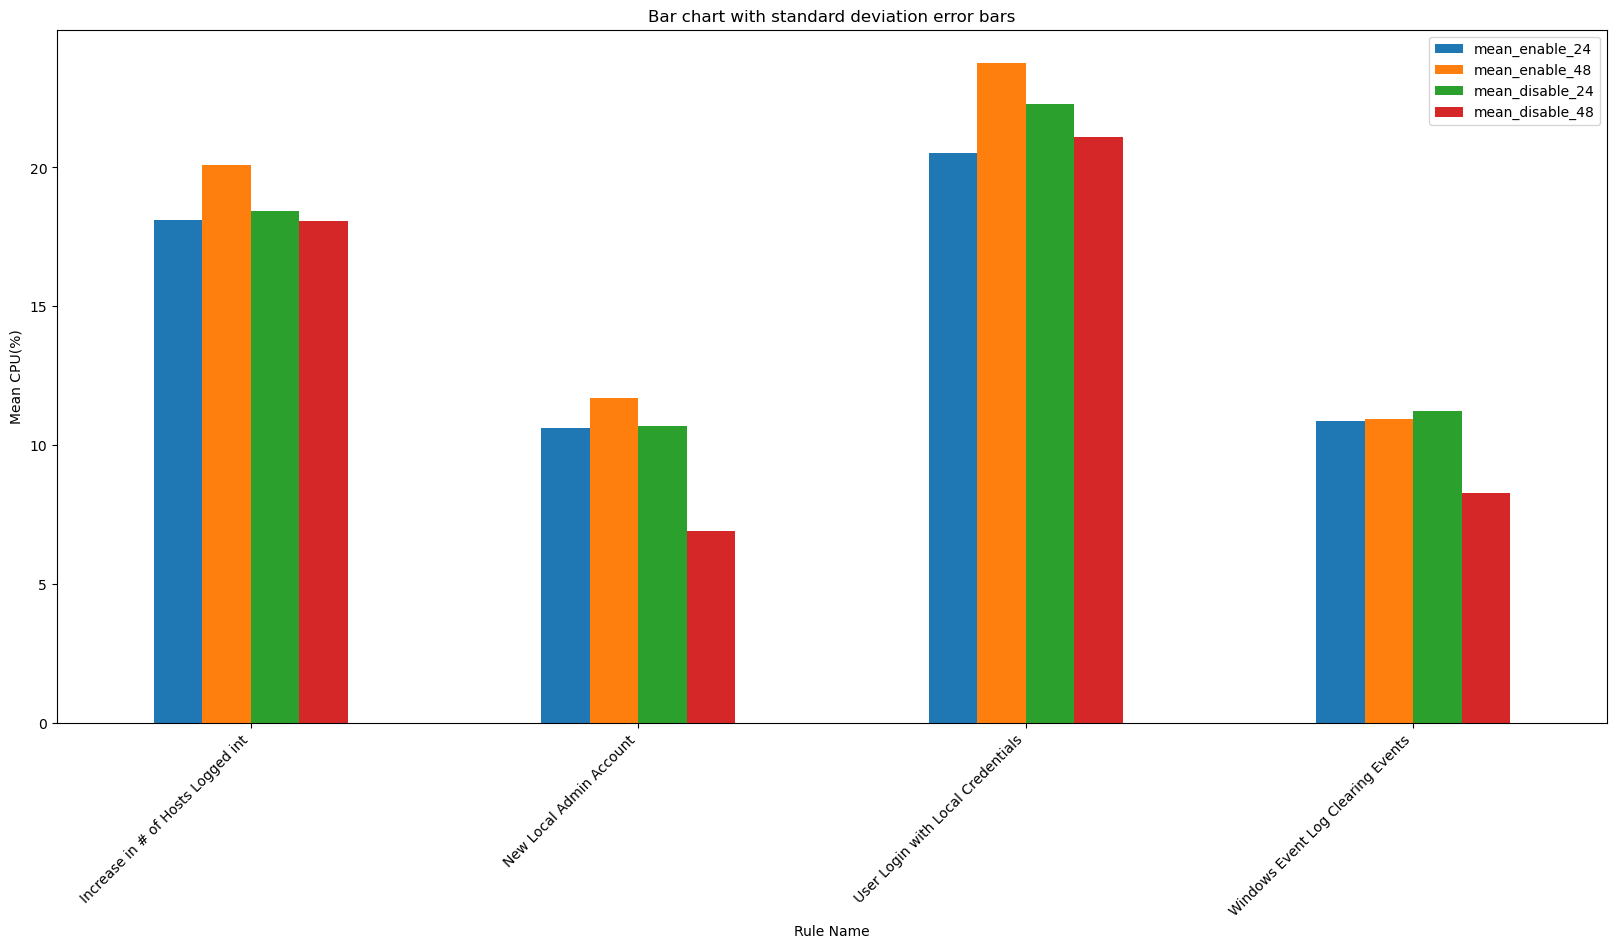

In [40]:
# Set up the figure
# fig, ax = plt.subplots()
# df_to_plot = mean_std_df.reset_index().fillna(0)
# df_to_plot['std_15'] = df_to_plot['std_15'].astype(float)
# df_to_plot['std_30'] = df_to_plot['std_30'].astype(float)
# Plot the bars with error bars
mean_cols = [f"mean_{i}" for i in durations]
std_cols = [f"std_{i}" for i in durations]
ax = mean_std_df.reset_index()[["name"]+mean_cols].plot(x="name", kind="bar",capsize=4, rot=0, figsize=(20,9))
# ax = mean_std_df.reset_index()[["name"]+mean_cols].plot(x="name", yerr=mean_std_df[std_cols].T.values, kind="bar",capsize=4, rot=0, figsize=(20,9))
# ax.bar(mean_std_df.reset_index()['name'], mean_std_df.reset_index()[['mean_0','mean_1']], capsize=5)
# plt.rcParams["figure.figsize"] = (20, 9)
# Add axis labels and title
ax.set_xlabel('Rule Name')
ax.set_ylabel('Mean CPU(%)')
ax.set_title('Bar chart with standard deviation error bars')
# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


In [43]:
relevant_processes_pid_names.groupby('name').apply(lambda g: integrate.trapz(g['CPU(%)'], x=g['delta_time']))

name
Increase in # of Hosts Logged int    139.540020
New Local Admin Account               32.323367
User Login with Local Credentials    208.340708
Windows Event Log Clearing Events     40.679437
dtype: float64

In [44]:
relevant_processes_pid_names.values

array([[Timestamp('2023-06-08 12:40:00.751596800+0000', tz='UTC'), 3666,
        'splunkd', ..., 'Windows Event Log Clearing Events', 3666, 0.0],
       [Timestamp('2023-06-08 12:40:00.934272256+0000', tz='UTC'), 3666,
        'splunkd', ..., 'Windows Event Log Clearing Events', 3666,
        0.182675456],
       [Timestamp('2023-06-08 12:40:01.099630080+0000', tz='UTC'), 3666,
        'splunkd', ..., 'Windows Event Log Clearing Events', 3666,
        0.34803328],
       ...,
       [Timestamp('2023-06-08 12:40:12.189276416+0000', tz='UTC'), 4090,
        'splunkd', ..., 'User Login with Local Credentials', 4090,
        11.437679616],
       [Timestamp('2023-06-08 12:40:12.252651264+0000', tz='UTC'), 4090,
        'splunkd', ..., 'User Login with Local Credentials', 4090,
        11.501054464],
       [Timestamp('2023-06-08 12:40:12.327145984+0000', tz='UTC'), 4090,
        'splunkd', ..., 'User Login with Local Credentials', 4090,
        11.575549184]], dtype=object)

In [45]:
# concatenate the three data frames along the columns axis
merged_df = pd.concat([x for x in relevant_names_inegral_dict.values()], axis=1)
durations = [1]
num_of_different_durations = len([x for x in durations])
# select even and odd columns from the 'CPU(%)' columns
mean_std_df = pd.concat([merged_df.iloc[:, i::num_of_different_durations].agg(['mean', 'std'], axis=1).add_suffix('_'+str(durations[i])) for i in range(num_of_different_durations)], axis=1)
# mean_std_df.iloc[:, 0:2].columns = mean_std_df.iloc[:, 0:2].add_suffix('_odd').columns
# mean_std_df.iloc[:, 2:4].columns = mean_std_df.iloc[:, 2:4].add_suffix('_even').columns
# print the final dataframe
mean_std_df

,mean_1,std_1
name,,
Increase in # of Hosts Logged int,120.438259,21.381184
New Local Admin Account,34.747182,2.299977
User Login with Local Credentials,196.260893,39.319405
Windows Event Log Clearing Events,38.973061,5.370882


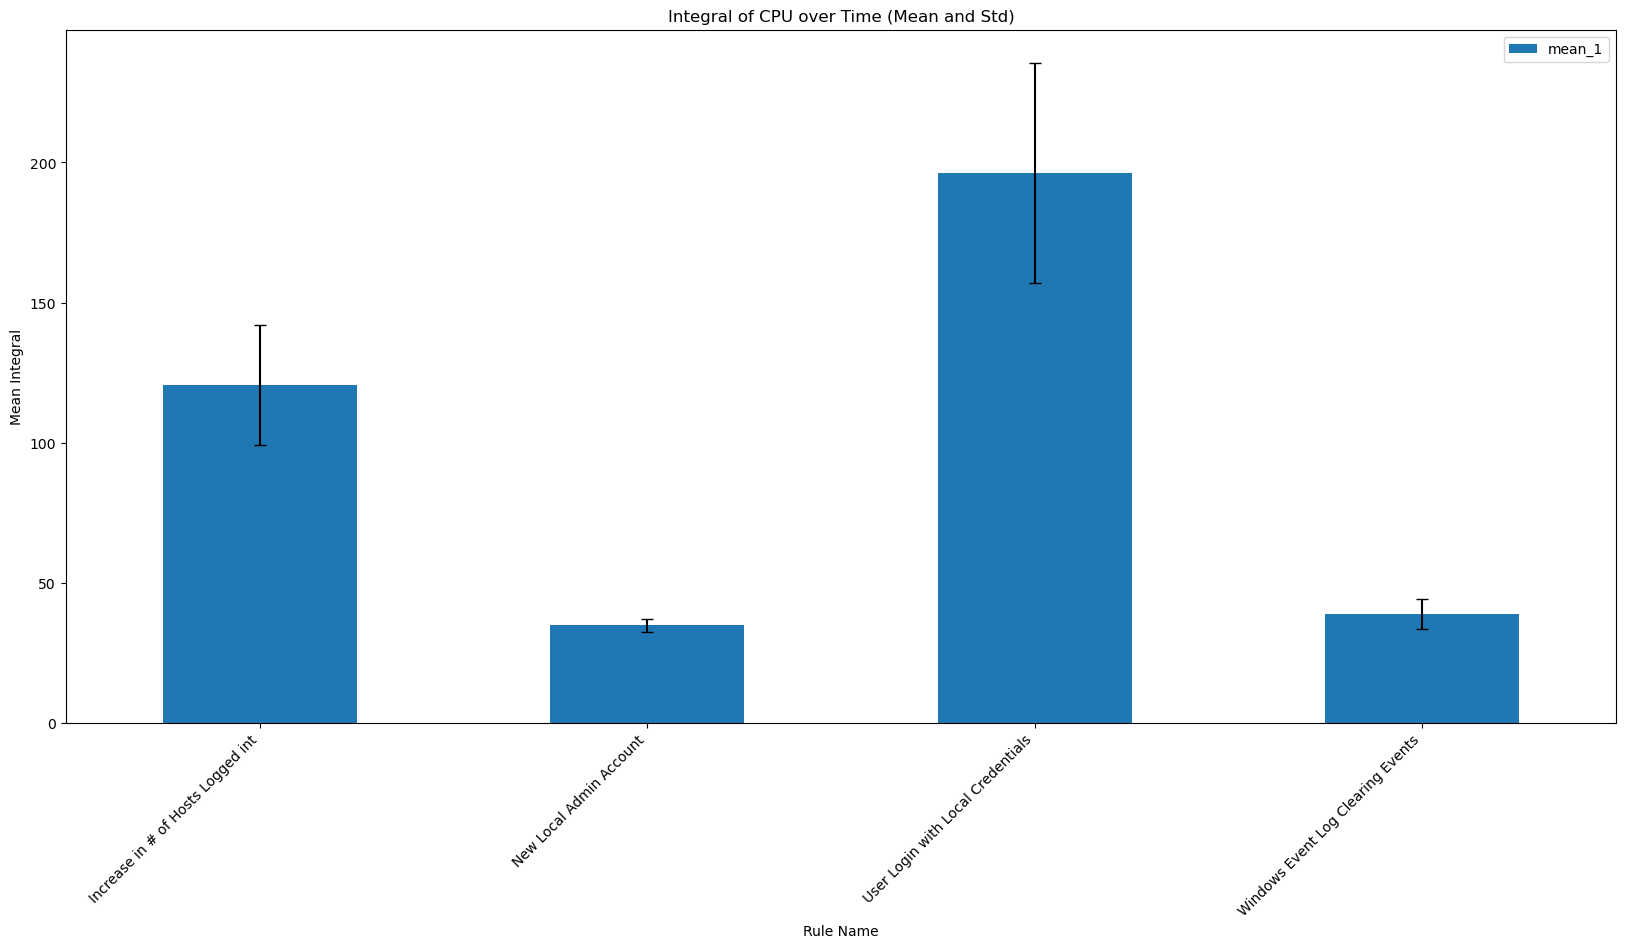

In [46]:

# Set up the figure
# fig, ax = plt.subplots()
# df_to_plot = mean_std_df.reset_index().fillna(0)
# df_to_plot['std_15'] = df_to_plot['std_15'].astype(float)
# df_to_plot['std_30'] = df_to_plot['std_30'].astype(float)
# Plot the bars with error bars
mean_cols = [f"mean_{i}" for i in durations]
std_cols = [f"std_{i}" for i in durations]
ax = mean_std_df.reset_index()[["name"]+mean_cols].plot(x="name", yerr=mean_std_df[std_cols].T.values, kind="bar", rot=0, capsize=4, figsize=(20,9))
# ax.bar(mean_std_df.reset_index()['name'], mean_std_df.reset_index()[['mean_0','mean_1']], capsize=5)
# plt.rcParams["figure.figsize"] = (20, 9)
# Add axis labels and title
ax.set_xlabel('Rule Name')
ax.set_ylabel('Mean Integral')
ax.set_title('Integral of CPU over Time (Mean and Std)')
# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

In [47]:
df.integral[0]

{'Windows Event Log Clearing Events': 39.66785027467283,
 'New Local Admin Account': 35.41175174419554,
 'Increase in # of Hosts Logged int': 111.11761702284639,
 'User Login with Local Credentials': 172.57471908326698}

In [48]:
sum_df = df
sum_df['sum_integral'] = df.integral.apply(lambda x: sum(x.values()))

In [49]:
sum_df

,integral,duration,measurment_num,kind,logs_number,sum_integral
0,{'Windows Event Log Clearing Events': 39.66785...,enable_24,Measurement 22,lite,76,358.771938
1,"{'New Local Admin Account': 32.91334126636185,...",enable_48,Measurement 23,lite,40,447.093561
2,{'Windows Event Log Clearing Events': 43.79784...,disable_24,Measurement 24,heavy,97,332.294769
3,{'Windows Event Log Clearing Events': 40.90465...,disable_48,Measurement 25,heavy,4,418.795795


In [50]:
df_group = sum_df.groupby(['duration','kind']).agg(['mean','std'])
df_group.columns = df_group.columns.to_flat_index()
df_group = df_group.reset_index()
df_group.columns = ['duration', 'kind','logs_number_mean','logs_number_std','sum_integral_mean','sum_integral_std']
df_group

/tmp/ipykernel_5789/3215586396.py:1: FutureWarning: ['integral', 'measurment_num'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_group = sum_df.groupby(['duration','kind']).agg(['mean','std'])


,duration,kind,logs_number_mean,logs_number_std,sum_integral_mean,sum_integral_std
0,disable_24,heavy,97.0,NaN,332.294769,NaN
1,disable_48,heavy,4.0,NaN,418.795795,NaN
2,enable_24,lite,76.0,NaN,358.771938,NaN
3,enable_48,lite,40.0,NaN,447.093561,NaN


In [51]:
df_group['logs_number_std2'] = df_group['logs_number_mean']-df_group.logs_number_std/2
df_group['logs_number_std'] = df_group['logs_number_mean']+df_group.logs_number_std/2
df_group['sum_integral_std2'] = df_group['sum_integral_mean']-df_group.sum_integral_std/2
df_group['sum_integral_std'] = df_group['sum_integral_mean']+df_group.sum_integral_std/2
df_group

,duration,kind,logs_number_mean,logs_number_std,sum_integral_mean,sum_integral_std,logs_number_std2,sum_integral_std2
0,disable_24,heavy,97.0,NaN,332.294769,NaN,NaN,NaN
1,disable_48,heavy,4.0,NaN,418.795795,NaN,NaN,NaN
2,enable_24,lite,76.0,NaN,358.771938,NaN,NaN,NaN
3,enable_48,lite,40.0,NaN,447.093561,NaN,NaN,NaN


In [52]:
line = alt.Chart(df_group).mark_line(point=True).encode(
            alt.Y("sum_integral_mean:Q",title='Sum CPU(%) Integral over Time'),
            alt.X(f"logs_number_mean:Q",title='Count of ingested logs quantity'),
        ).properties(
    width=1000,
    height=400,
    title=''
)
line

alt.Chart(...)

In [53]:
x

NameError: name 'x' is not defined

In [54]:
sum_df

,integral,duration,measurment_num,kind,logs_number,sum_integral
0,{'Windows Event Log Clearing Events': 39.66785...,enable_24,Measurement 22,lite,76,358.771938
1,"{'New Local Admin Account': 32.91334126636185,...",enable_48,Measurement 23,lite,40,447.093561
2,{'Windows Event Log Clearing Events': 43.79784...,disable_24,Measurement 24,heavy,97,332.294769
3,{'Windows Event Log Clearing Events': 40.90465...,disable_48,Measurement 25,heavy,4,418.795795


In [55]:
x = sum_df.pivot_table(columns=['kind'], index=['logs_number','duration'], values='sum_integral').reset_index().groupby('duration').agg(['mean','std']).fillna(0)
x.columns = x.columns.to_flat_index()
x.columns = ['logs_number_mean','logs_number_std','heavy_sum_integral_mean','heavy_sum_integral_std','lite_sum_integral_mean','lite_sum_integral_std']

<Axes: xlabel='logs_number_mean'>

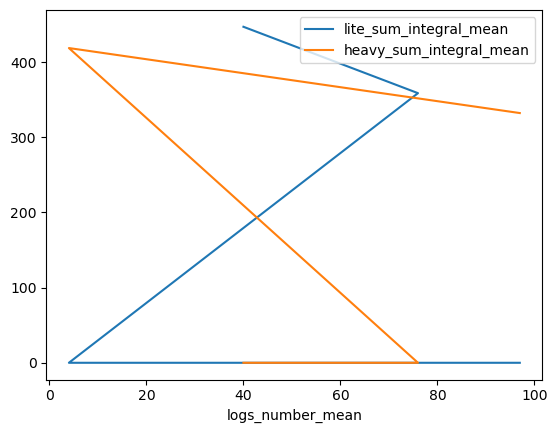

In [56]:
x.plot(x='logs_number_mean',y=['lite_sum_integral_mean', 'heavy_sum_integral_mean'], yerr=x[['lite_sum_integral_std', 'heavy_sum_integral_std']], capsize=40)

In [57]:
import altair as alt

# Melt the dataframe to long format
df_long = df_group.melt(id_vars=['duration', 'kind'])

# Define the base chart with faceting
base_chart = alt.Chart(df_long).mark_line(point=True).encode(
    alt.Y('value:Q', title='Mean and Standard Deviation'),
    alt.X('logs_number:Q'),
    alt.Color('kind:N'),
    facet=alt.Facet('stat:N', title=None, columns=2),
)

# Add error bars to each panel
error_bars_chart = base_chart.mark_errorbar().encode(
    y='value:Q',
    yError='stderr:Q',
)

# Calculate the standard error of the mean for each group
stderr = df_group.groupby(['duration', 'kind']).agg('std') / df_group.groupby(['duration', 'kind']).agg('count')

# Layer the error bars on top of the base chart
chart = (base_chart + error_bars_chart).transform_calculate(
    stderr=alt.datum['std'] / alt.datum['count']**0.5
).properties(
    title='Mean and Standard Deviation with Error Bars'
)

chart.show()


ValueError: Faceted charts cannot be layered. Instead, layer the charts before faceting.

In [ ]:
df.groupby(['duration','kind']).plot(x='logs_number', y='integral',kind='bar')

TypeError: no numeric data to plot

In [ ]:
import requests
from time import sleep

# Define the Splunk URL and login credentials
url = "https://132.72.81.185:8089/servicesNS/shoueii/splunkawssecuritymon/saved/searches/"
username = "shoueii"
password = "sH231294"

# Define the list of scheduled search names to enable/disable
searches_to_enable = ['aws_detect_cloudtrail_trail_deleted Clone1', 'aws_detect_cloudwatch_log_group_delete Clone1', 'aws_detect_cloudwatch_log_stream_delete Clone1', 'aws_detect_ec2_instances_run Clone1', 'aws_detect_ec2_vpc_flow_config_deleted Clone1', 'aws_detect_ecr_image_auth_token_get Clone1']
searches_to_disable = ['aws_detect_iam_user_deleted Clone', 'aws_detect_iam_user_created Clone', 'aws_detect_iam_new_policy_version_assignment Clone', 'aws_detect_iam_group_added_with_user_from_ec2 Clone', 'aws_detect_ecr_new_repo_image_create Clone', 'aws_detect_ec2_ssh_public_key_addition Clone']


for search_name in searches_to_enable:
    # Define the headers and payload for the request
    headers = {"Content-type": "application/json"}
    payload = {"disabled": 0}

    # Make the request to update the scheduled search
    response = requests.post(
        url + search_name + "/",
        headers=headers,
        auth=(username, password),
        data=payload,
        verify=False,
    )
    sleep(2)
    # Check the response status code
    if response.status_code == 200:
        print("Scheduled search updated successfully")
    else:
        print("Error updating scheduled search")
        print(response.content)
    

# Loop through the list of searches to disable and disable them
for search_name in searches_to_disable:
   # Define the headers and payload for the request
    headers = {"Content-type": "application/json"}
    payload = {"disabled": 1}

    # Make the request to update the scheduled search
    response = requests.post(
        url + search_name + "/",
        headers=headers,
        auth=(username, password),
        data=payload,
        verify=False,
    )

    # Check the response status code
    if response.status_code == 200:
        print("Scheduled search updated successfully")
    else:
        print("Error updating scheduled search")
        print(response.content)
    

/home/green-sec/miniconda3/lib/python3.10/site-packages/urllib3/connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Scheduled search updated successfully


/home/green-sec/miniconda3/lib/python3.10/site-packages/urllib3/connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Scheduled search updated successfully


/home/green-sec/miniconda3/lib/python3.10/site-packages/urllib3/connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Scheduled search updated successfully


/home/green-sec/miniconda3/lib/python3.10/site-packages/urllib3/connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Scheduled search updated successfully


/home/green-sec/miniconda3/lib/python3.10/site-packages/urllib3/connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Scheduled search updated successfully


/home/green-sec/miniconda3/lib/python3.10/site-packages/urllib3/connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Scheduled search updated successfully


/home/green-sec/miniconda3/lib/python3.10/site-packages/urllib3/connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Scheduled search updated successfully


/home/green-sec/miniconda3/lib/python3.10/site-packages/urllib3/connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Scheduled search updated successfully


/home/green-sec/miniconda3/lib/python3.10/site-packages/urllib3/connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Scheduled search updated successfully


/home/green-sec/miniconda3/lib/python3.10/site-packages/urllib3/connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Scheduled search updated successfully


/home/green-sec/miniconda3/lib/python3.10/site-packages/urllib3/connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Scheduled search updated successfully
Scheduled search updated successfully


/home/green-sec/miniconda3/lib/python3.10/site-packages/urllib3/connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [ ]:
import altair as alt
import pandas as pd
alt.data_transformers.enable('csv')

DataTransformerRegistry.enable('csv')

In [83]:
import altair as alt
import pandas as pd
df = pd.read_csv('data_summary.csv')
df_dtsplunk = df[df['host']=='dt-splunk']
df = df[df['host']!='dt-splunk']
# create stacked bar chart with x axis tilted 45 degrees
chart = alt.Chart(df).mark_bar().encode(
    alt.X('host:N', title='Host name'),
    alt.Y('count:Q', title='Logs count'),
    alt.Color('sourcetype:N', title='Log sourcetype'),
).properties(
    width=1500,
    height=300,
    title='24 hours Logs count per host and sourcetype'
).configure_axis(
    labelFontSize=8,
    titleFontSize=20,
    labelAngle=45
)
chart

alt.Chart(...)

In [84]:
df = pd.read_csv('eventtype_host.csv')
# create stacked bar chart with x axis tilted 45 degrees
chart = alt.Chart(df).mark_bar().encode(
    alt.X('host:N', title='Host name'),
    alt.Y('count:Q', title='Logs count'),
    alt.Color('eventtype:N', title='Log eventtype'),
).properties(
    width=1500,
    height=300,
    title='Last week Logs count per host and eventtype'
).configure_axis(
    labelFontSize=8,
    titleFontSize=20,
    labelAngle=45
)
chart

alt.Chart(...)

In [87]:
df

,eventtype,host,count


In [89]:
# find all the hosts that starts with 'dt'
df = pd.read_csv('eventtype_host.csv')
df = df[df['host'].str.startswith('DT')]
# create stacked bar chart with x axis tilted 45 degrees
chart = alt.Chart(df).mark_bar().encode(
    alt.X('host:N', title='Host name'),
    alt.Y('count:Q', title='Logs count'),
).properties(
    width=1500,
    height=300,
    title='One week Logs count per host and sourcetype'
).configure_axis(
    labelFontSize=8,
    titleFontSize=20,
    labelAngle=45
)
chart

alt.Chart(...)

In [73]:
df = pd.read_csv('eventtype_hour_30.csv')
df.hour = pd.to_datetime(df.hour)
# create stacked bar chart with x axis tilted 45 degrees
chart = alt.Chart(df).mark_bar().encode(
    alt.X('hours(hour):T', title='Hour'),
    alt.Y('count:Q', title='Logs count'),
    alt.Color('eventtype:N', title='Log event type',sort=alt.SortField(field='count', order='descending')),
)
# add rule lines for sign the days
rule = alt.Chart(df).mark_rule(color='red', strokeDash=[5, 5]).encode(
    x='day:T'
).transform_timeunit(
    day='yearmonthdate(hour)'
)
(chart).properties(
    width=1500,
    height=300,
    title='Last month Logs count per event type'
).configure_axis(
    labelFontSize=15,
    titleFontSize=20,
    labelAngle=45
)


alt.Chart(...)

In [80]:
df = pd.read_csv('eventtype_hour_30.csv')
df.hour = pd.to_datetime(df.hour)
# create stacked bar chart with x axis tilted 45 degrees
chart = alt.Chart(df).mark_bar().encode(
    alt.X('day(hour):T', title='Day'),
    alt.Y('count:Q', title='Logs count'),
    alt.Color('eventtype:N', title='Log event type',sort=alt.SortField(field='count', order='descending')),
)
# add rule lines for sign the days
rule = alt.Chart(df).mark_rule(color='red', strokeDash=[5, 5]).encode(
    x='day:T'
).transform_timeunit(
    day='yearmonthdate(hour)'
)
(chart).properties(
    width=1500,
    height=300,
    title='Last month Logs count per event type'
).configure_axis(
    labelFontSize=15,
    titleFontSize=20,
    labelAngle=45
)


alt.Chart(...)

In [ ]:
chart = alt.Chart(df[df.hour.dt.hour==7]).mark_line().encode(
    alt.X('hour:T', title='Hour'),
    alt.Y('count:Q', title='Logs count'),
    alt.Color('eventtype:N', title='Log event type'),
)
# add rule lines for sign the days
rule = alt.Chart(df).mark_rule(color='red', strokeDash=[3, 3]).encode(
    x='day:T'
).transform_timeunit(
    day='yearmonthdate(hour)'
)
(chart+rule).properties(
    width=1500,
    height=300,
    title='Last month Logs count per event type'
).configure_axis(
    labelFontSize=15,
    titleFontSize=20,
    labelAngle=45
)

alt.LayerChart(...)

In [ ]:
df[df.hour.dt.hour==7].groupby('eventtype').sum().sort_values('count', ascending=False)

/tmp/ipykernel_30871/2909946745.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df[df.hour.dt.hour==7].groupby('eventtype').sum().sort_values('count', ascending=False)


,count
eventtype,
endpoint_services_processes,700636
windows_event_signature,700636
wineventlog_windows,481102
winsec,314056
wineventlog_security,314056
ms-sysmon-regmod,219265
windows_account_management,127190
wineventlog_system,100351
winsystem,100351


In [ ]:
# make pie chart from dt splunk
pie_chart = alt.Chart(df[df.hour.dt.hour==7]).mark_arc().encode(
    alt.Theta('count:Q', title='Logs count'),
    alt.Color('eventtype:N', title='Log eventtype',sort=alt.SortField(field='count', order='descending')),
).properties(
    width=800,
    height=800,
    title='Last month 7 am count per sourcetype'
)
pie_chart

alt.Chart(...)

In [ ]:
# make pie chart from dt splunk
df = pd.read_csv('eventtype_source.csv')
chart = alt.Chart(df).mark_bar().encode(
    alt.Color('eventtype:N', title='Log eventtype'),
    alt.Y('count:Q', title='Logs count'),
    alt.X('source:N', title='source'),
).properties(
    width=1000,
    height=800,
    title='Last week DT-Splunk host Logs count per eventtype'
).configure_axis(
    labelFontSize=15,
    titleFontSize=20,
    labelAngle=45
).configure_legend(
    labelFontSize=15
)
chart

alt.Chart(...)

In [ ]:
# make pie chart from dt splunk
pie_chart = alt.Chart(df_dtsplunk).mark_arc().encode(
    alt.Theta('count:Q', title='Logs count'),
    alt.Color('sourcetype:N', title='Log sourcetype',sort=alt.SortField(field='count', order='descending')),
).properties(
    width=600,
    height=500,
    title='24 hours DT-Splunk host Logs count per sourcetype'
)
pie_chart

alt.Chart(...)

In [57]:
hosts = pd.read_csv('last_2_weeks_hosts.csv')

In [75]:
hosts.host = hosts.host.str.lower()
hosts.sort_values('host', ascending=True)
# cancel show all the df config
alt.data_transformers.disable_max_rows()




DataTransformerRegistry.enable('csv')

In [31]:
df.user.unique()

array(['CYB301-4$', 'Guest', 'LOCAL SERVICE', 'NETWORK SERVICE',
       'NOT_TRANSLATED', 'SYSTEM', 'tigranb', 'yevsikov', 'Administrator',
       'CYB301-ATAM-20$', 'D77C167F-2E40-48BC-B64A-E12FAD864D2F',
       'DefaultAccount', 'WDAGUtilityAccount', 'muralidh',
       'CYB301-ATAM-21$', '-', 'DT-117-01$', 'DWM-1', 'UMFD-0', 'UMFD-1',
       'idodah', 'DT-AWS-NEO4J-2$', 'DT-CTI-DRL$', 'DT-IT$', 'R18-ILYA$',
       'adinr', 'bsrelan', 'nicolayg', 'DT-JAIDIP$', 'DT-O2$', 'salitsl',
       'DT-O5$', 'vitals', 'yehudith', 'yehudith@bgu-users', 'DT-O7$',
       'DWM-2', 'UMFD-2', 'admin', 'yovell', 'DT-PRINT$', 'Eitan',
       'dvaleria', 'freidiya', 'ilialey', 'ANONYMOUS LOGON', 'DT-WDS$',
       'peledf@bgu.ac.il', 'DTS12-VM1$', 'SQLSERVERAGENT', 'DTS12-VM2$',
       'MSSQLServerOLAPService', 'ISE-MGMT$', 'LB-003-1$', 'LB-003-10$',
       'LB-003-11$', 'LB-003-12$', 'LB-003-13$', 'LB-003-14$',
       'LB-003-15$', 'LB-003-16$', 'LB-003-17$', 'LB-003-18$',
       'LB-003-19$', 'LB-003-2$

In [35]:
df = pd.read_csv('host_host_type_user_24h.csv')
df = df[df.host_type=='dt']
chart = alt.Chart(df).mark_bar().encode(
    alt.Color('host:N', title='host'),
    alt.Y('count:Q', title='Logs count'),
    alt.X('user:N', title='user_name',sort=alt.SortField(field='host_type', order='descending')),
).properties(
    width=2500,
    height=600,
    title='hosts'
).configure_axis(
    labelFontSize=15,
    titleFontSize=20,
    labelAngle=45
).configure_legend(
    labelFontSize=15
)
chart

alt.Chart(...)

In [41]:
df = pd.read_csv('source_host_type_user_24h.csv')
df = df[df.host_type=='dt']
chart = alt.Chart(df).mark_bar().encode(
    alt.Color('source:N', title='host'),
    alt.Y('count:Q', title='Logs count'),
    alt.X('user:N', title='user_name',sort=alt.SortField(field='host_type', order='descending')),
).properties(
    width=2500,
    height=600,
    title='hosts'
).configure_axis(
    labelFontSize=15,
    titleFontSize=20,
    labelAngle=45
).configure_legend(
    labelFontSize=15
)
chart

alt.Chart(...)

In [ ]:
df = pd.read_csv('host_type_host_24h.csv')
chart = alt.Chart(df).mark_bar().encode(
    alt.Color('host_type:N', title='host_type'),
    alt.Y('count:Q', title='Logs count'),
    alt.X('host:N', title='host',sort=alt.SortField(field='host_type', order='descending')),
).properties(
    width=2500,
    height=600,
    title='hosts'
).configure_axis(
    labelFontSize=15,
    titleFontSize=20,
    labelAngle=45
).configure_legend(
    labelFontSize=15
)
chart

In [16]:
df = pd.read_csv('host_type_source_24h.csv')
chart = alt.Chart(df).mark_bar().encode(
    alt.X('host_type:N', title='host_type'),
    alt.Y('count:Q', title='Logs count'),
    alt.Color('source:N', title='source'),
).properties(
    width=800,
    height=600,
    title='hosts sources'
).configure_axis(
    labelFontSize=15,
    titleFontSize=20,
    labelAngle=45
).configure_legend(
    labelFontSize=15,
    labelLimit=10000
)
chart

alt.Chart(...)